# Deaclare libraries

In [1]:
import numpy as np
import pandas as pd
import gdal
from matplotlib import pyplot as plt
import os
import re
import rasterio
from rasterio.merge import merge
from rasterio.plot import show

# Declare directories

In [2]:
ECOSGVISdir='/home/gbessardon/DATA/LAI_treatement/Uncompress/ALBVIS_SAT'
outputVISdir='/home/gbessardon/DATA/laialebdomodis/MODISECOSG_VIS'
ECOSG_VIS_SFdir='/home/gbessardon/DATA/LAI_treatement/Uncompress/ALBVIS_SNOWFREE'
outputVIS_SFdir='/home/gbessardon/DATA/laialebdomodis/MODISECOSG_VIS_SF'
ECOSGNIRdir='/home/gbessardon/DATA/LAI_treatement/Uncompress/ALBNIR_SAT'
outputNIRdir='/home/gbessardon/DATA/laialebdomodis/MODISECOSG_NIR'
ECOSG_NIR_SFdir='/home/gbessardon/DATA/LAI_treatement/Uncompress/ALBNIR_SNOWFREE'
outputNIRdir='/home/gbessardon/DATA/laialebdomodis/MODISECOSG_NIR_SF'

MODISdir='/home/gbessardon/DATA/laialebdomodis/'


# Function definition

## Create output dir if does not exists

In [ ]:
def Createdir(outputdir):
    if not os.path.isdir(outputdir):
        os.mkdir(outputdir)
    return

## Function to merge MODIS with ECOCLIMAP-SG

In [4]:
def merge_eco_mos(fneco,fnmodis,out_fp,h=54000,w=129600):
    src=rasterio.open(fneco)
    src2=rasterio.open(fnmodis)
    src_files_to_mosaic=[src,src2]
    mosaic, out_trans = merge(src_files_to_mosaic)
    mosaic[mosaic==255]=0
    out_meta = src2.meta.copy()    
    # Update the metadata
    out_meta.update({"driver": out_meta.get('driver'),
                  "height": h,
                  "width": w,
                  "transform": out_trans,
                  "nodata":0,
                 }
                )
    with rasterio.open(out_fp, "w", **out_meta) as dest:
        dest.write(mosaic)
    return 

## Function to create dataframe to merge ECOSG and MODIS dataframe

In [ ]:
def Create_merge_dataframe(ecodir,modisdir,startecosg,startmodis,dayspattern='\d\d\d\d',
                     endecosg='c.dir_2',endmodis='ecosgproj.tif'):
    listecosg=[os.path.join(ecodir,f) for f in os.listdir(ecodir) if (f.startswith(startecosg) and f.endswith(endecosg))]
    listmodis=[os.path.join(modisdir,f) for f in os.listdir(modisdir) if (f.startswith(startmodis) and f.endswith(endmodis))]
    daysp=startmodis+dayspattern
    dayslist= [re.search(daysp,f).group().split(startmodis)[1] for f in listmodis]
    testlist=[le for d in dayslist for le in listecosg if d in le]
    Resultlist=[os.path.join(outputdir,t.split(ecodir)[1]).replace(endecosg,'c.tif') for t in testlist]
    data={'ECOSGfiles':testlist, 'MODISfiles':listmodis, 'days':dayslist, 'outputlist': Resultlist}
    df=pd.DataFrame(data) 
    return(df)

In [ ]:
Create_dataframe(ECOSGdir,MODISdir,'AL-BH-VI','mosaic_VIS',
                 dayspattern='\d\d\d\d',endecosg='c.dir_2',endmodis='ecosgproj.tif')
Create_dataframe(ECOSGdir,MODISdir,'AL-BH-VI','mosaic_VIS_SF',
                 dayspattern='\d\d\d\d',endecosg='c.dir_2',endmodis='ecosgproj.tif')
Create_dataframe(ECOSGdir,MODISdir,'AL-BH-NI','mosaic_NIR',
                 dayspattern='\d\d\d\d',endecosg='c.dir_2',endmodis='ecosgproj.tif')
Create_dataframe(ECOSGdir,MODISdir,'AL-BH-NI','mosaic_NIR_SF',
                 dayspattern='\d\d\d\d',endecosg='c.dir_2',endmodis='ecosgproj.tif')
Loopover(vis_gr,outputdir,'mosaic_VIS')
Loopover(vis_sf_gr,outputdir,'mosaic_VIS_SF')
Loopover(nir_gr,outputdir,'mosaic_NIR')
Loopover(nir_sf_gr,outputdir,'mosaic_NIR_SF')

In [8]:
for ind in range(0,len(df)):
    merge_eco_mos(df.ECOSGfiles[ind],df.MODISfiles[ind],df.outputlist[ind])

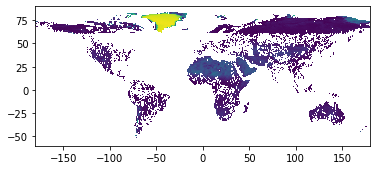

<AxesSubplot:>

In [14]:
src=rasterio.open(df.outputlist[ind-4])
show(src)

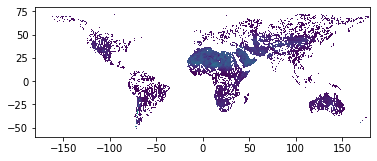

<AxesSubplot:>

In [15]:
src=rasterio.open(df.ECOSGfiles[ind-4])
show(src)